In [1]:
# Student Number: C1893753

# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [3]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# if you use Google Colab:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# change this line your folder where the data is found
basedir = '/content/drive/MyDrive'

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [6]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [7]:
### DO NOT CHANGE THIS CELL
df = load_csv('/content/drive/MyDrive')
df.head()
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## Question 1a

In [8]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
  df=df.drop(['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about',
'host_location','host_total_listings_count','host_thumbnail_url','host_picture_url','host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'], axis = 1, errors='ignore')
  return df

In [9]:
df = drop_cols(df)
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [10]:
def drop_cols_na(df, threshold=0.0):
  if threshold==0.0:
    return df
  threshold = len(df.index) * threshold
  cols=[c for c in df.columns if sum(df[c].isnull()) >= threshold]
  df=df.drop(cols,axis=1,errors='ignore')
  return df

In [11]:
df = drop_cols_na(df,0.3)
cpy=df

## Question 1b

In [12]:
def binary_encoding(df):
  df=df.dropna(how='any')
  cols=list(df.columns[df.isin(['t','f']).any()])
  for col in cols:
    df[col] = df[col].astype('category').cat.codes
  return df

In [13]:
df = binary_encoding(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [14]:
# hint: check Pandas to_datetime method
def add_host_days(df):
  df['host_since']=df['host_since'].apply(pd.to_datetime)
  df['host_days'] = (pd.to_datetime("now")-df['host_since'].apply(pd.to_datetime)).dt.days
  return df

In [15]:
def convert_price(df):
  df.price = df.price.str[1:-3]
  df.price = df.price.str.replace(",", "")
  df.price = df.price.astype('float') 
  return df

In [16]:
df = add_host_days(df)
df = convert_price(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [17]:
df.shape[0]

14946

In [18]:
# How many hosts offer 2 or more properties for rent?
vc=df['host_name'].value_counts()

print(df.host_name.value_counts().reset_index(name="count").query("count > 2")["index"])

0              Martijn
1               Jeroen
2               Jasper
3       Wendy And Bram
4                Joost
             ...      
1141     Thierry Tasso
1142         Catherine
1143             Tamar
1144              Joan
1145             Wieke
Name: index, Length: 1146, dtype: object


In [19]:
# What is the highest price for a listing?
print(df.price.max())

8000.0


In [20]:
# What is the ID of the listing that has the largest number of bedrooms?
df[df.bedrooms==df.bedrooms.max()]['id']

18137    45110290
Name: id, dtype: int64

In [21]:
# What is the ID of the listing with the largest advertised price
df[df.price==df.price.max()]['id']

88    258273
Name: id, dtype: int64

In [22]:
# There are different room types. How many listings are there for the most common room type?
v=df.room_type.value_counts()
print("Listing with common room type ",len(df[df.room_type==v.idxmax()].index))

Listing with common room type  11804


In [23]:
# How many hosts are there that have been registered for more than 3000 days?
print("No of hosts that have been registered for more than 3000 days : " ,len(df[df.host_days>3000].index))

No of hosts that have been registered for more than 3000 days :  2430


## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

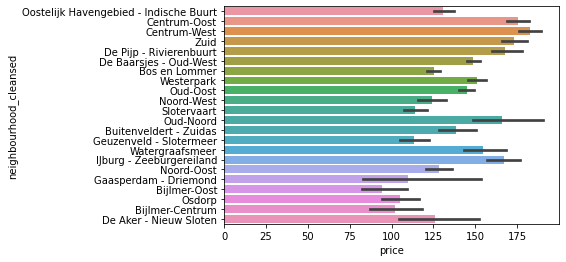

In [24]:
plot = sns.barplot(y = df['neighbourhood_cleansed'], x = df['price'], orient = 'h')
sns.set(rc={'figure.figsize':(20, 10)})

Plot a correlation matrix as instructed in the Coursework proforma:

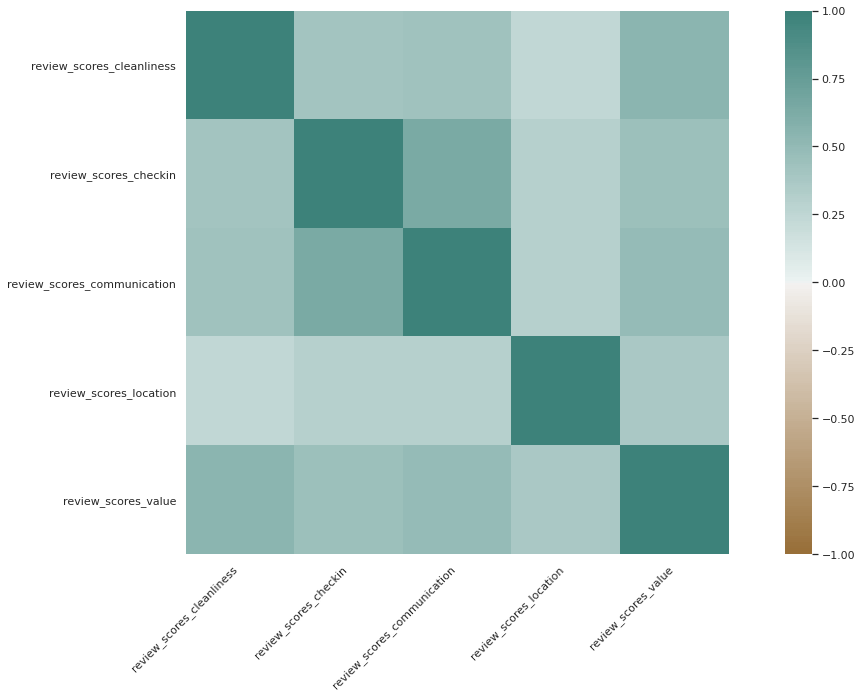

In [25]:
import seaborn as sns

corr = df[['review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 180, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Plot a geographical distribution as instructed in the Coursework proforma:

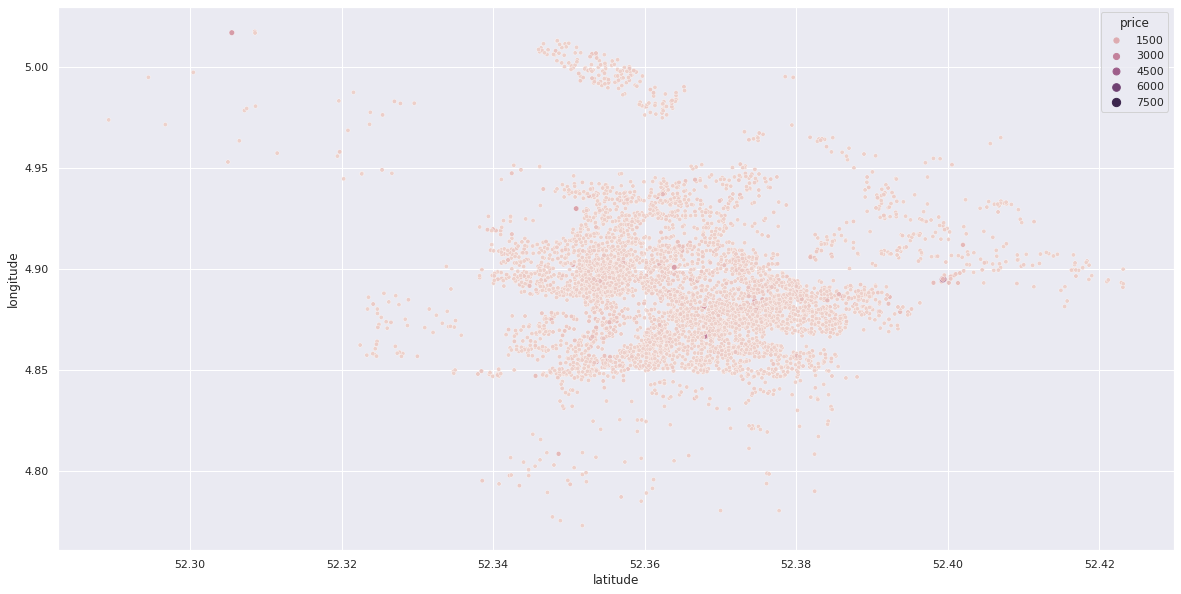

In [26]:
import seaborn as sns
data=df[df.price>150]
sns.scatterplot(x="latitude", y="longitude", data=data, hue="price",size="price")

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [27]:
import statsmodels.api as sm

model = sm.OLS(df.review_scores_rating, df[['review_scores_checkin','review_scores_cleanliness','review_scores_communication','review_scores_value','review_scores_location','review_scores_accuracy']])
results = model.fit()
print(results.pvalues>=.0001)

review_scores_checkin          False
review_scores_cleanliness      False
review_scores_communication    False
review_scores_value            False
review_scores_location         False
review_scores_accuracy         False
dtype: bool


**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): ...[Since p-value for Entire home/apt and Private room is 0.0, therefore there is a significant difference between Entire home/apt and Private room in terms of nightly prices. Also the p-value for category Entire home/apt and Shared room is 2.1531 (approx), so again there is a significant difference between Entire home/apt and Shared room in terms of nightly prices.]...

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): ...[After performing Bonferroni correction, there are no changes in number of significance differences as before performing this, we got two signficant differences and after performing Bonferroni correction, again we got two significant differences. But, after performing Bonferroni correction, we got two changes in p-values and the corrected p-values are 0.0 and 0.0001 (approx).]...


In [28]:
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import sem
from scipy.stats import t
def independent_ttest(data1, data2, alpha):
	# calculate means
	mean1, mean2 = mean(data1), mean(data2)
	# calculate standard errors
	se1, se2 = sem(data1), sem(data2)
	# standard error on the difference between the samples
	sed = sqrt(se1**2.0 + se2**2.0)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = len(data1) + len(data2) - 2
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p

In [29]:
import itertools
from itertools import permutations 
from statsmodels.sandbox.stats.multicomp import multipletests
  
uniquecols=list(df.room_type.value_counts().index)

c=list(itertools.combinations(uniquecols, 2))
alpha=0.001
pValues=[]
catCols_1=[]
catCols_2=[]
for a in c:
  cat1 = df[df['room_type']==a[0]]
  cat2 = df[df['room_type']==a[1]]
  catCols_1.append(a[0])
  catCols_2.append(a[1])
  t_stat, dof, cv, p=independent_ttest(cat1['price'],cat2['price'],0.001)
  #print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, dof, cv, p))
  # interpret via critical value
  #if abs(t_stat) <= cv:
  #  print('Accept null hypothesis that the means are equal.')
  #else:
  #  print('Reject the null hypothesis that the means are equal.')
  # interpret via p-value
  pValues.append(p)
  if p < alpha:
    print('Reject the null hypothesis that the mean prices are equal.P-value : '+str(p)+ ' There is significant difference in prices for category '+a[0]+' and '+ a[1])



print('Perform bonferroni correction')
# Create a list of the adjusted p-values
p_adjusted_list = multipletests(pValues, alpha=0.001, method='bonferroni')
rejectionStatus=p_adjusted_list[0]
correctedPValue=p_adjusted_list[1]
for i,status in enumerate(rejectionStatus):
  print("Rejection status ",status," Corrected p-value ",correctedPValue[i])

print("\n\n")
datValues = {'Room_Type_1': catCols_1,
        'Room_Type_2': catCols_2,
        'P_values':pValues
        }

newDf = pd.DataFrame(datValues, columns = ['Room_Type_1', 'Room_Type_2','P_values'])

print (newDf)

Reject the null hypothesis that the mean prices are equal.P-value : 0.0 There is significant difference in prices for category Entire home/apt and Private room
Reject the null hypothesis that the mean prices are equal.P-value : 2.1531166523258705e-05 There is significant difference in prices for category Entire home/apt and Shared room
Perform bonferroni correction
Rejection status  True  Corrected p-value  0.0
Rejection status  False  Corrected p-value  0.9871771160267535
Rejection status  True  Corrected p-value  0.00012918699913955223
Rejection status  False  Corrected p-value  0.008544319320962224
Rejection status  False  Corrected p-value  1.0
Rejection status  False  Corrected p-value  0.3128458870447588



       Room_Type_1   Room_Type_2  P_values
0  Entire home/apt  Private room  0.000000
1  Entire home/apt    Hotel room  0.164530
2  Entire home/apt   Shared room  0.000022
3     Private room    Hotel room  0.001424
4     Private room   Shared room  0.621507
5       Hotel room 

## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: ...[The default data type for empty series will be 'object' instead of 'float64' in a future version. So to specify a data type explicitly to silence this warning, we opted for the variables with 'object' data type. Also we printed the best p-values for those variables.]...

In [30]:
newData=df.drop(['id','name','host_id','host_since','host_name','first_review','last_review'], axis = 1)

tmp = pd.get_dummies(newData[['neighbourhood_cleansed','property_type','room_type']])
tmp.head()


newData=pd.concat([newData,tmp], axis=1)
newData1=pd.concat([newData,tmp], axis=1)
newData=newData.drop(['neighbourhood_cleansed','property_type','room_type'],axis=1)

newCols=list(newData.columns)
newCols.remove('price')

In [31]:
import pandas as pd
import statsmodels.api as sm

def variable_selection(newData,predictors, target,alpha=0.01):
    predictors = []
    included = list(predictors)
    adjRsquared=0
    while True:
        changed=False
        # forward step
        excluded = list(set(newData.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(target, (sm.add_constant(pd.DataFrame(newData[included+[new_column]]))).astype(float)).fit()
            new_pval[new_column] = model.pvalues[new_column]
            adjRsquared=model.rsquared
        best_pval = new_pval.min()
        if best_pval < alpha:
            best_feature = new_pval.argmin()
            #included.append(best_feature)
            sel=new_pval.index.values.tolist()[new_pval.argmin()]
            included.append(sel)
            changed=True
            print('Add   with p-value {0} {1}'.format(sel, best_pval))

        if not changed:
            break

    return included

In [32]:
featuresSelected=variable_selection(newData.drop('price',axis=1),newCols,newData.price,0.01)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if sys.path[0] == '':


Add   with p-value bedrooms 0.0
Add   with p-value property_type_Lighthouse 1.4453323474980748e-279
Add   with p-value accommodates 5.594014979454787e-138
Add   with p-value room_type_Private room 1.3438856117214288e-109
Add   with p-value neighbourhood_cleansed_Centrum-West 1.6460960990584459e-43
Add   with p-value availability_365 1.4187709959593404e-36
Add   with p-value neighbourhood_cleansed_Centrum-Oost 9.008770835738998e-23
Add   with p-value number_of_reviews_ltm 1.6840071935188062e-22
Add   with p-value neighbourhood_cleansed_De Pijp - Rivierenbuurt 3.147619847868224e-19
Add   with p-value property_type_Entire loft 8.352204556245897e-15
Add   with p-value minimum_nights 3.522873682941416e-14
Add   with p-value neighbourhood_cleansed_Zuid 1.2274063513278787e-13
Add   with p-value neighbourhood_cleansed_De Baarsjes - Oud-West 1.2347972595024164e-12
Add   with p-value host_listings_count 5.694573261629126e-11
Add   with p-value neighbourhood_cleansed_Westerpark 1.1177032031340538

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [33]:
def recommend_neighbourhood(df, budget_min, budget_max, relative):
  newData=None
  if relative==True:
      newData=df.loc[(df['price']>=budget_min) & (df['price']< budget_max) ]

  else:
       df['price']=df['price'].astype(int)
       newData=df.loc[(df['price']>=budget_min) & (df['price']< budget_max)]
  return newData['neighbourhood_cleansed']

In [34]:
recommend_neighbourhood(df,40,560,True)

0        Oostelijk Havengebied - Indische Buurt
1                                  Centrum-Oost
2                                  Centrum-West
3                                  Centrum-West
4                                  Centrum-Oost
                          ...                  
18437                              Centrum-West
18445                              Centrum-Oost
18446                              Centrum-Oost
18450                              Centrum-West
18506                              Centrum-West
Name: neighbourhood_cleansed, Length: 14586, dtype: object

### Price recommender for hosts

In [35]:
def euclidean(lat1, long1,lat2,long2):
    return ((lat1**2)-(lat2**2)) + ((long1**2)-(long2**2)) 

def recommend_price(df, latitude, longitude, n_neighbours, room_type):
  roomtypes=['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
  print("Room Type ",room_type)
  if room_type not in roomtypes:
    return None
  d=df[df['room_type']==room_type]
  d['dist']=d.apply(lambda x: euclidean(x.latitude, x.longitude,latitude,longitude),axis=1)
  d = d.sort_values('dist',ascending=False).head(n_neighbours)
  return d

In [36]:
recommend_price(newData1,52,5,10,'Private room')

Room Type  Private room


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


host_is_superhost  host_listings_count  ...  room_type_Shared room       dist
2979                   0                 13.0  ...                      0  43.630231
2589                   0                 13.0  ...                      0  43.630231
3239                   1                  1.0  ...                      0  43.289857
17407                  1                  2.0  ...                      0  43.231799
5423                   1                  2.0  ...                      0  43.230102
16772                  0                  2.0  ...                      0  43.160765
434                    1                  3.0  ...                      0  43.122044
3798                   1                  2.0  ...                      0  43.085650
13044                  0                  1.0  ...                      0  43.085615
5412                   0                  1.0  ...                      0  43.079238

[10 rows x 206 columns]

In [37]:
newData

host_is_superhost  ...  room_type_Shared room
0                      1  ...                      0
1                      0  ...                      0
2                      1  ...                      0
3                      1  ...                      0
4                      1  ...                      0
...                  ...  ...                    ...
18442                  0  ...                      0
18445                  0  ...                      0
18446                  0  ...                      0
18450                  0  ...                      0
18506                  0  ...                      0

[14946 rows x 115 columns]